In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Dell\Desktop\cognorise infotech\EMPLOYEE SALARIES FOR DIFFERENT JOB ROLS\ds_salaries.csv")

In [4]:
df.info

<bound method DataFrame.info of      work_year experience_level employment_type                   job_title  \
0         2020               MI              FT              Data Scientist   
1         2020               SE              FT  Machine Learning Scientist   
2         2020               SE              FT           Big Data Engineer   
3         2020               MI              FT        Product Data Analyst   
4         2020               SE              FT   Machine Learning Engineer   
..         ...              ...             ...                         ...   
602       2022               SE              FT               Data Engineer   
603       2022               SE              FT               Data Engineer   
604       2022               SE              FT                Data Analyst   
605       2022               SE              FT                Data Analyst   
606       2022               MI              FT                AI Scientist   

     salary salary_

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8624\3652405755.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette="Set3")


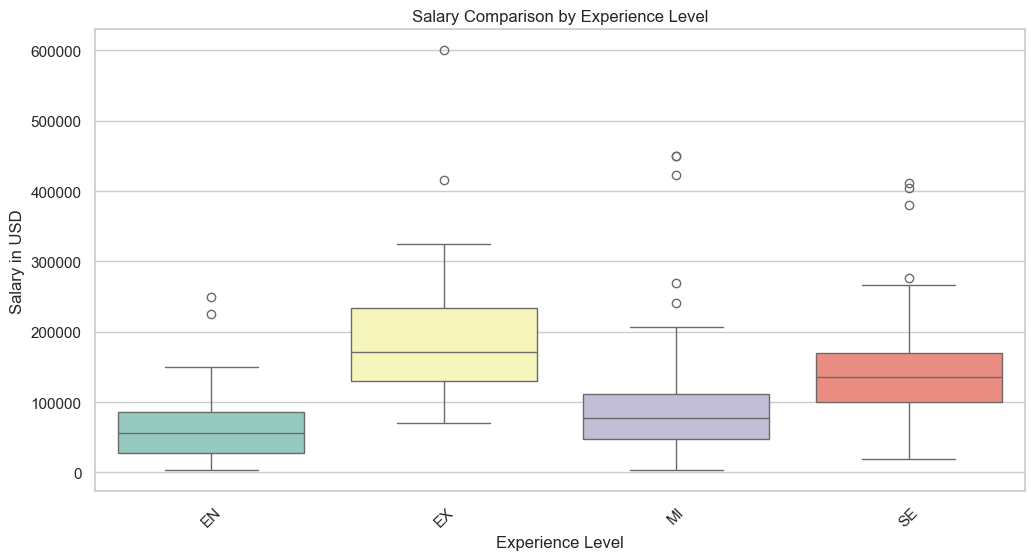

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df['experience_level'] = df['experience_level'].astype('category')

# Drop rows with missing salary_in_usd or experience_level
df = df.dropna(subset=['salary', 'experience_level'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot to compare salaries by experience level
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette="Set3")
ax.set_title('Salary Comparison by Experience Level')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


Average Salary by Work Year:
work_year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: salary_in_usd, dtype: float64


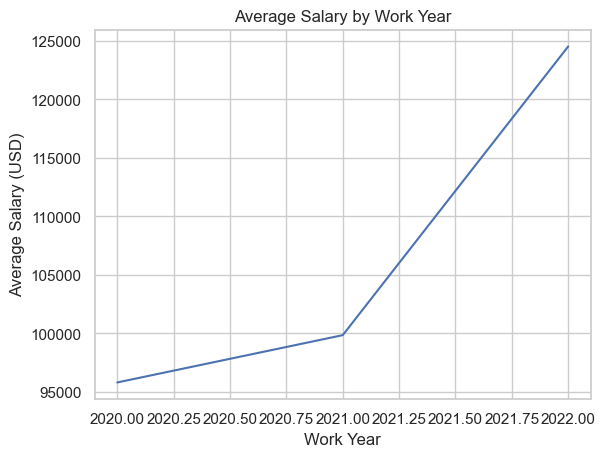

In [9]:
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()
print("Average Salary by Work Year:")
print(avg_salary_per_year)


import matplotlib.pyplot as plt
plt.plot(avg_salary_per_year.index, avg_salary_per_year.values)
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Work Year")
plt.show()


In [10]:
# Calculate average salary every experience level
avg_salary_per_level = df.groupby('experience_level')['salary_in_usd'].mean()

# Print the results
print("Average Salary by Experience Level:")
print(avg_salary_per_level)

Average Salary by Experience Level:
experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_8624\1916330736.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_per_level = df.groupby('experience_level')['salary_in_usd'].mean()


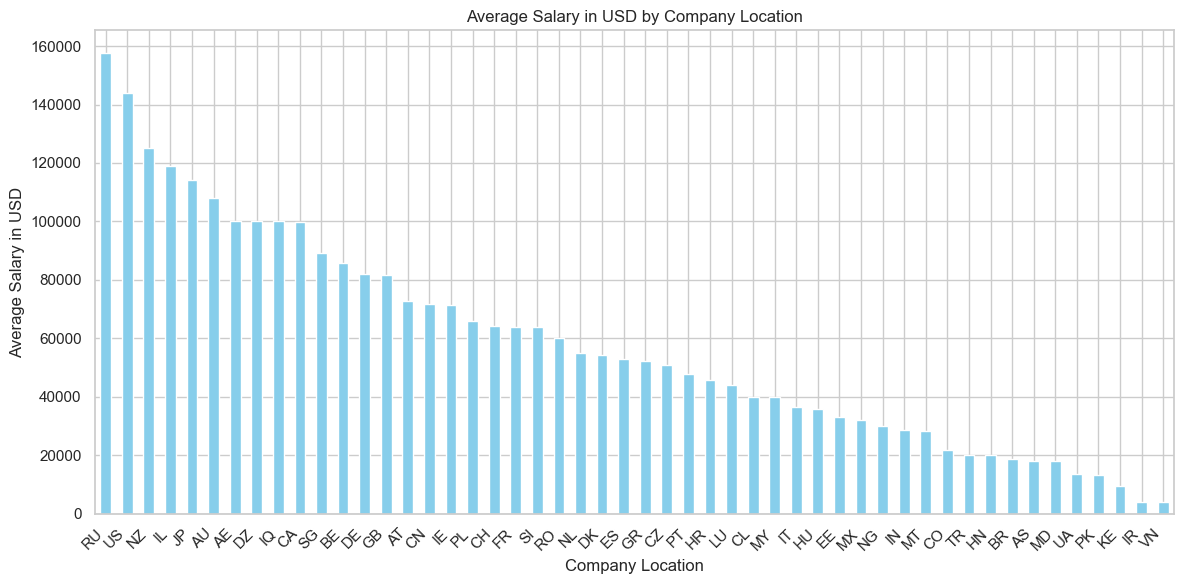

In [11]:
location_salary = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
location_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary in USD by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
correlation = df['remote_ratio'].corr(df['salary_in_usd'])

# Print the correlation coefficient
print("Correlation between Remote Ratio and Salary (USD):", correlation)

Correlation between Remote Ratio and Salary (USD): 0.13212233539422108


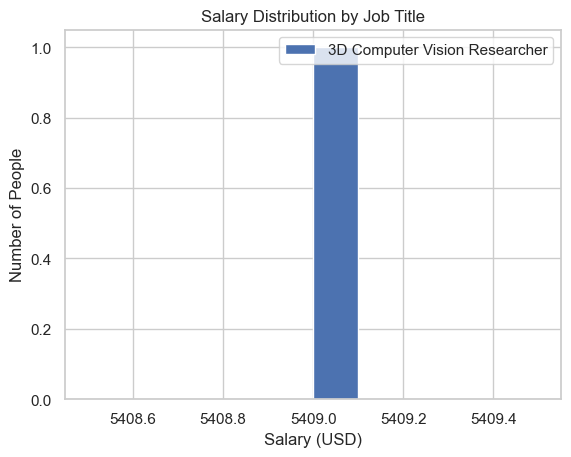

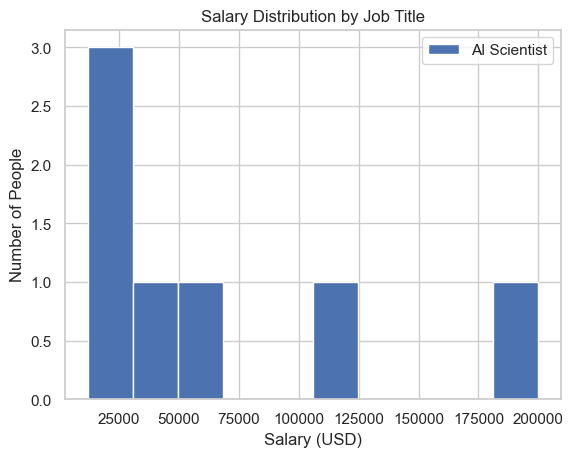

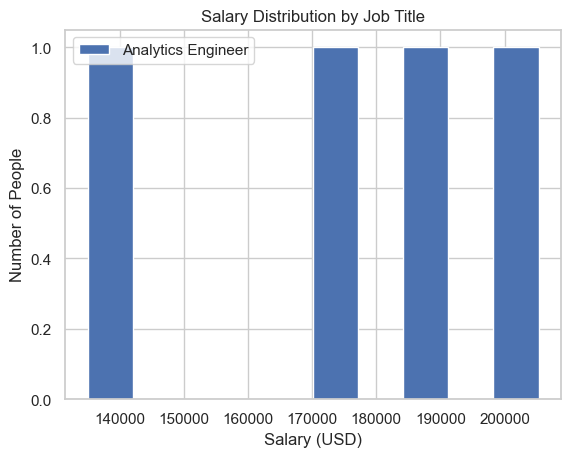

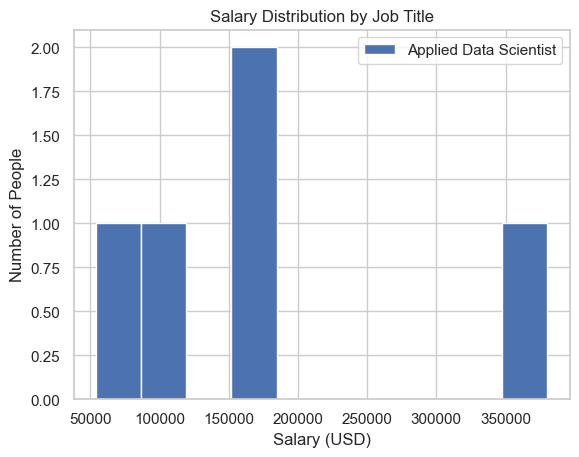

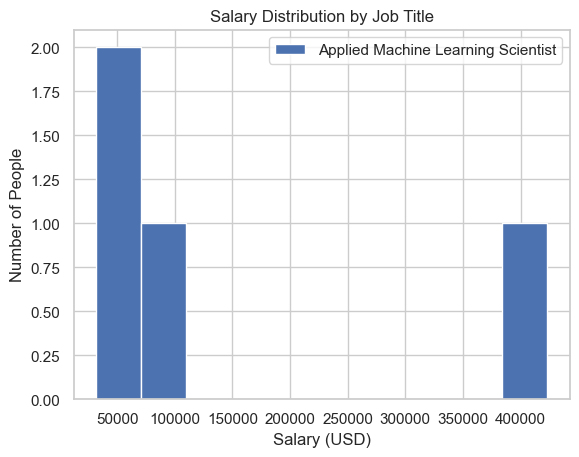

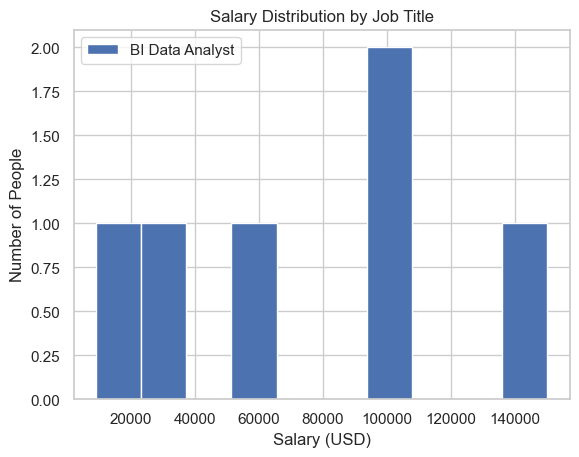

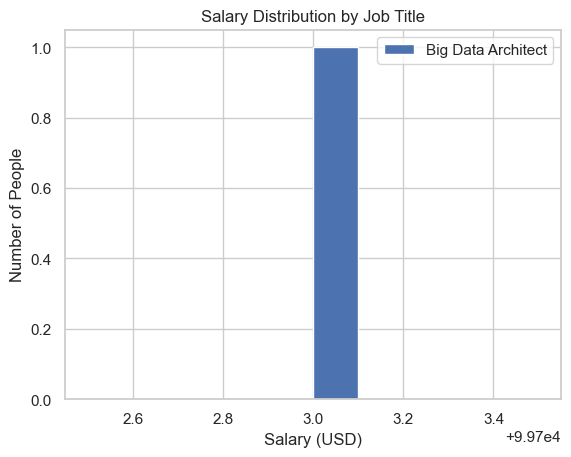

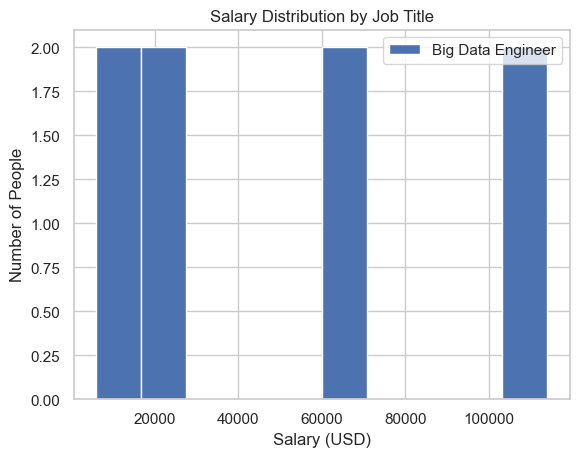

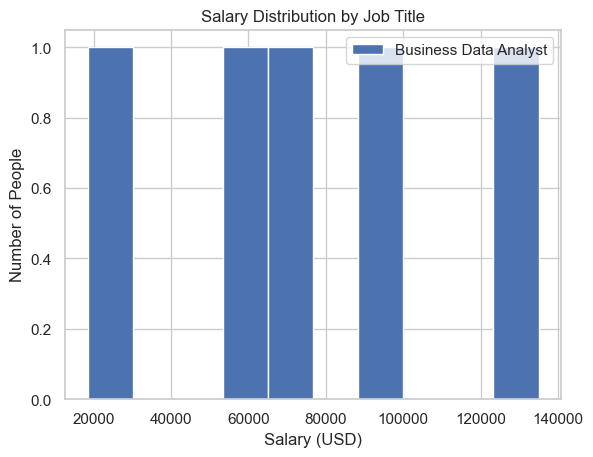

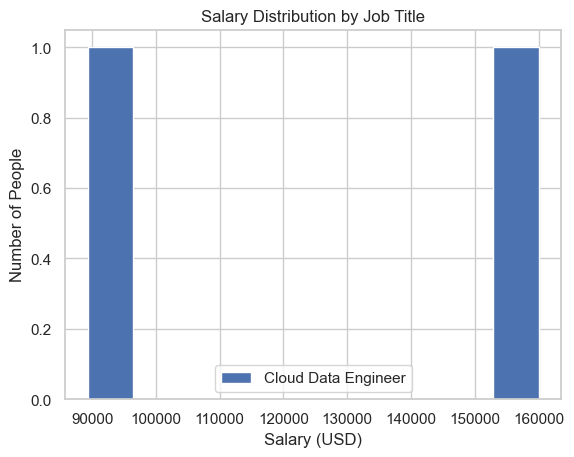

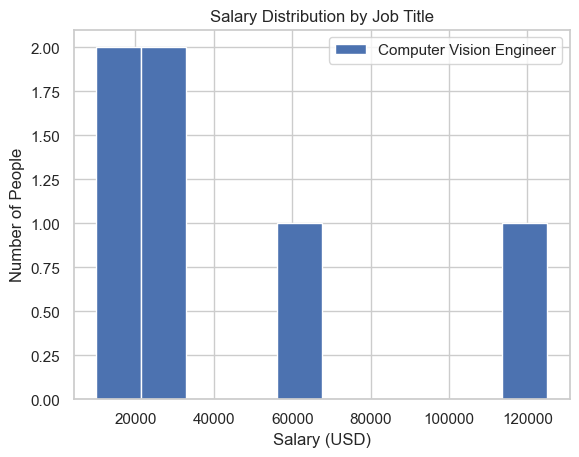

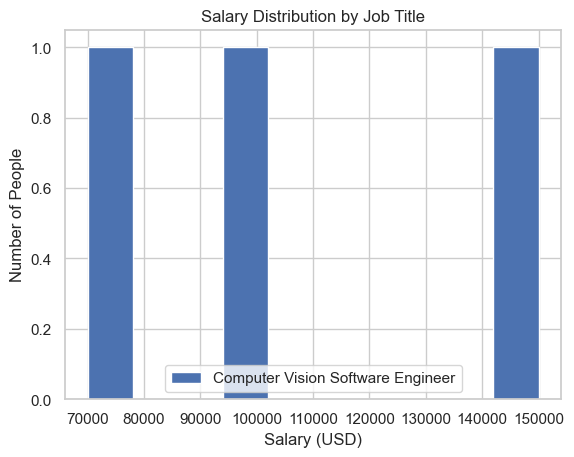

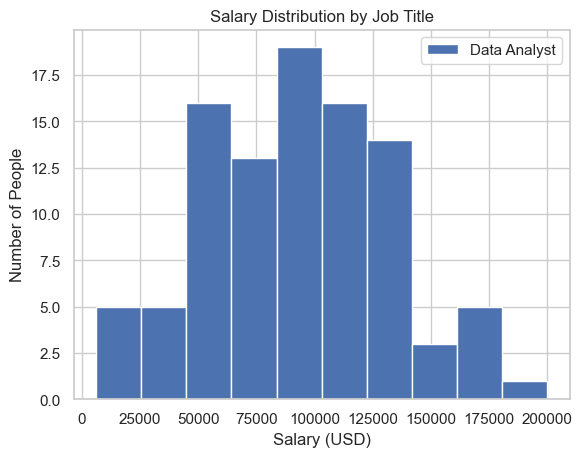

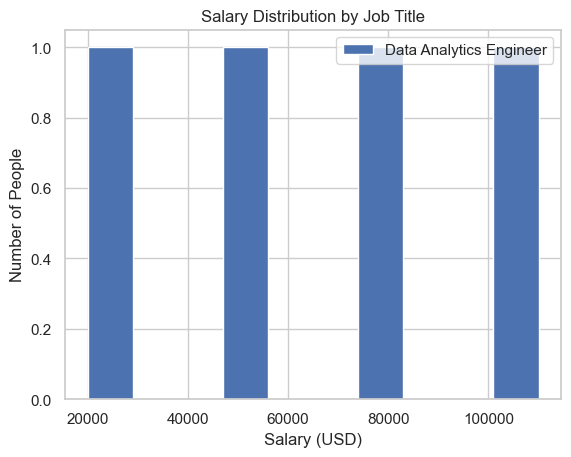

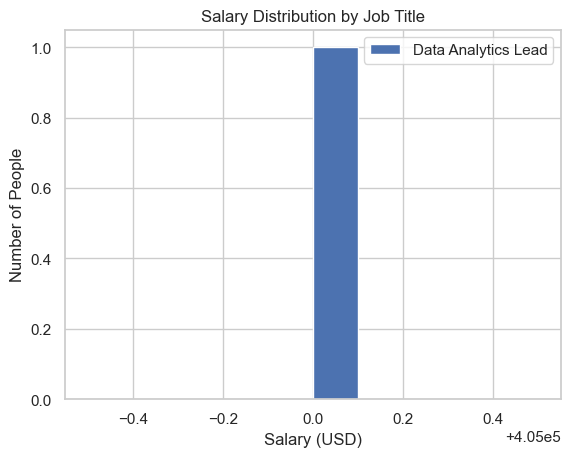

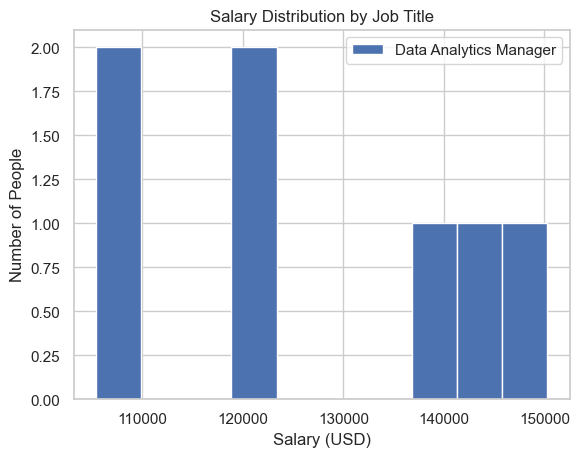

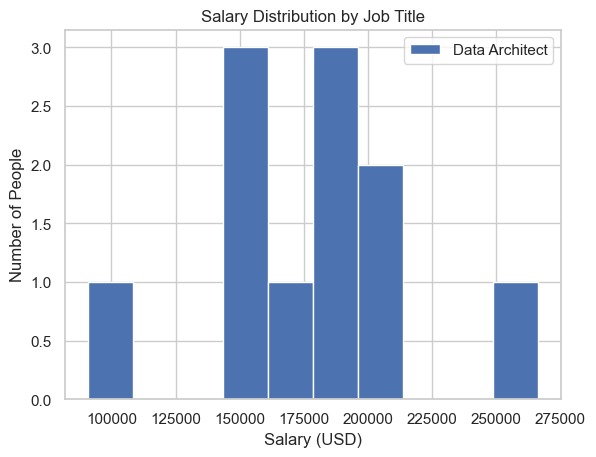

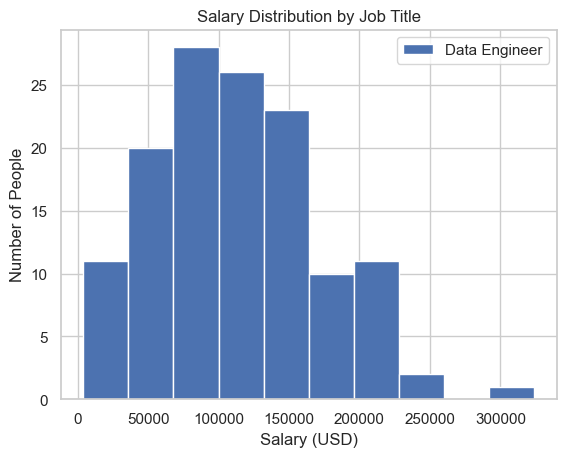

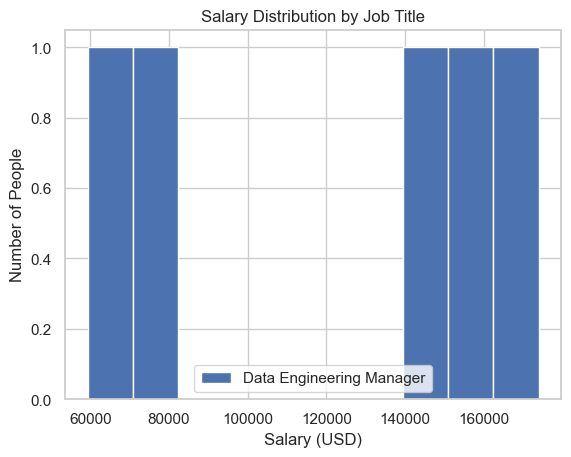

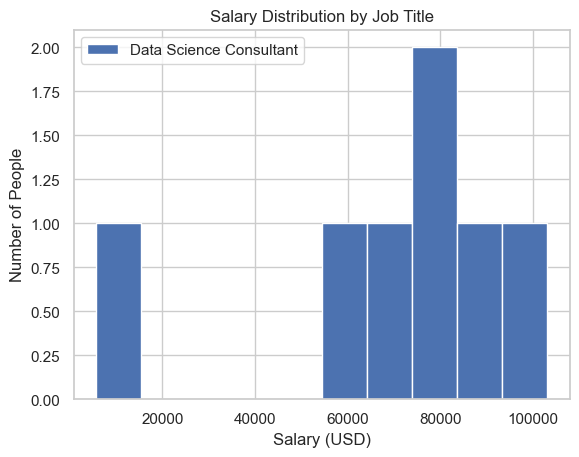

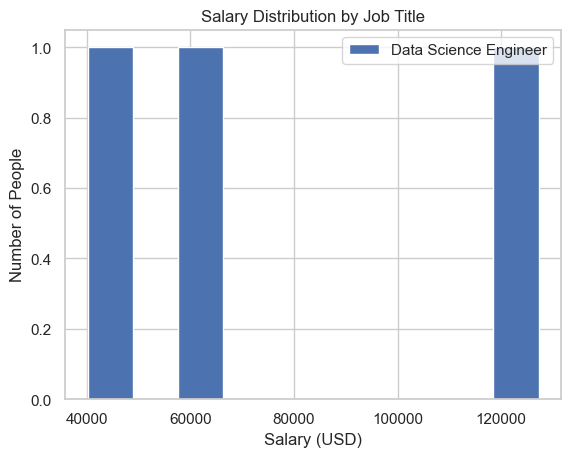

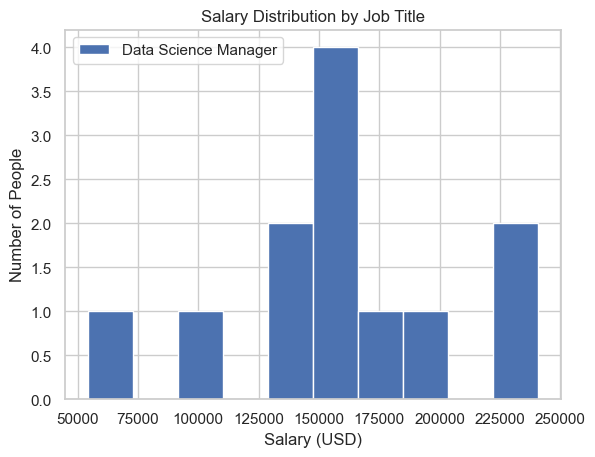

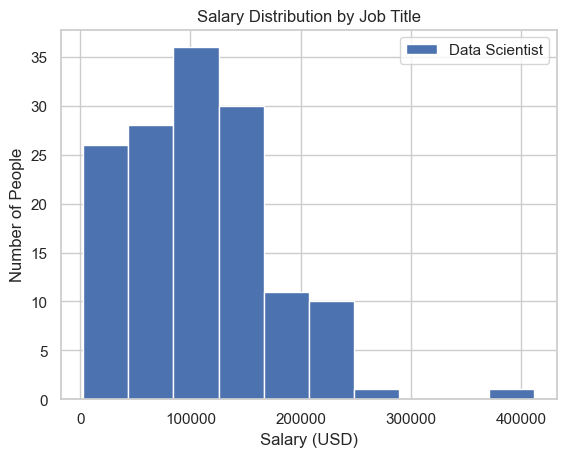

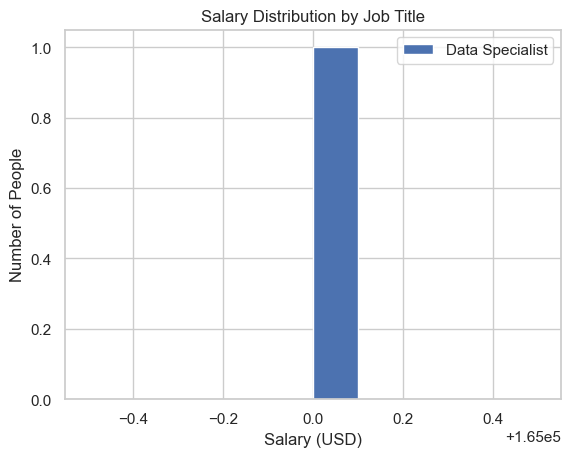

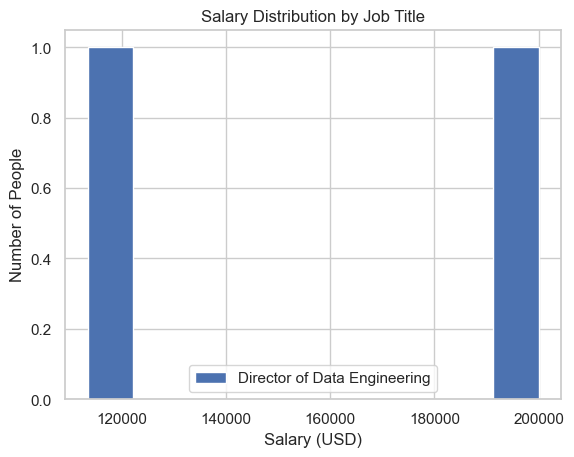

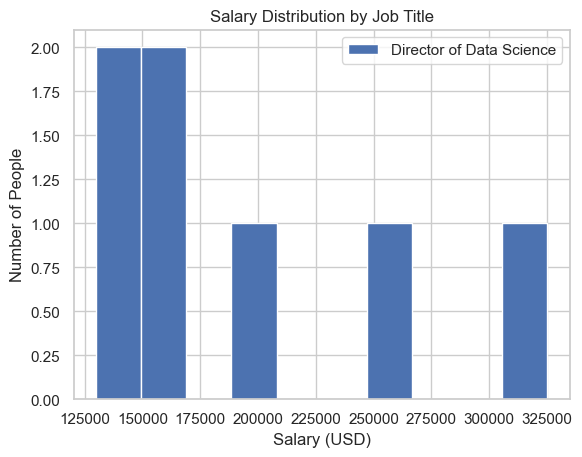

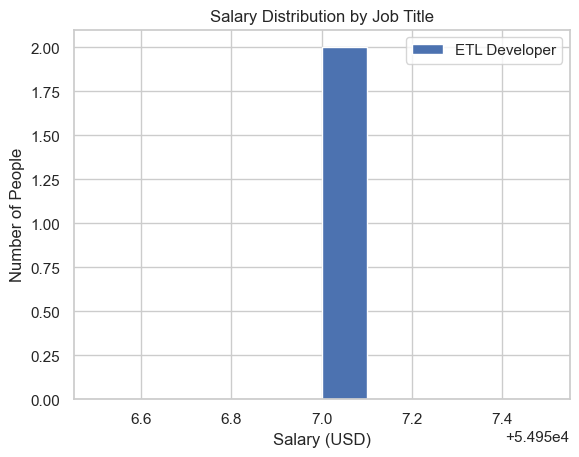

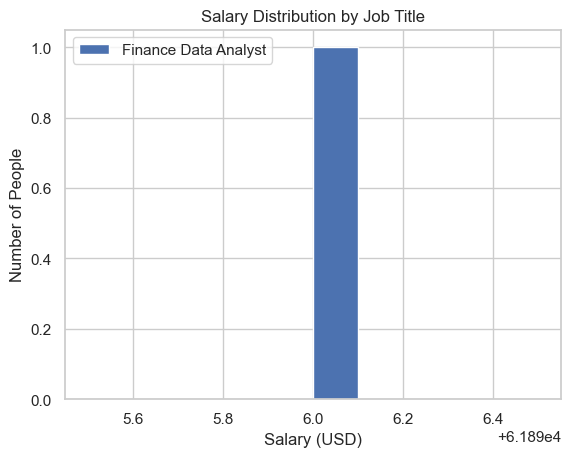

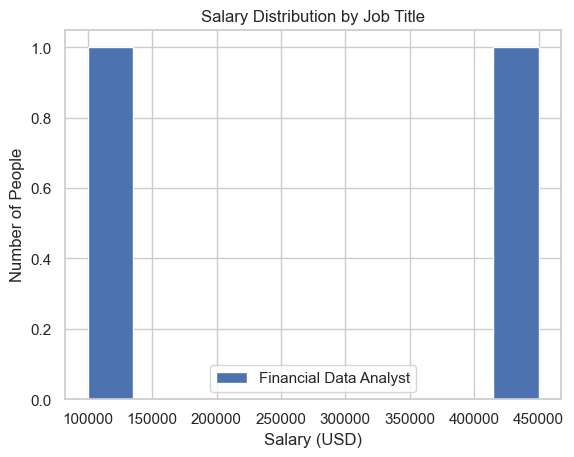

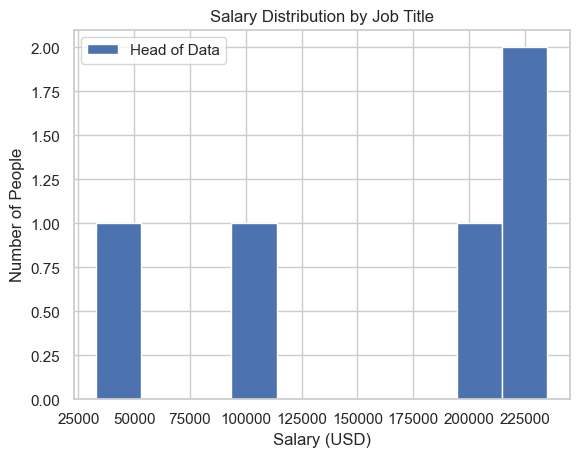

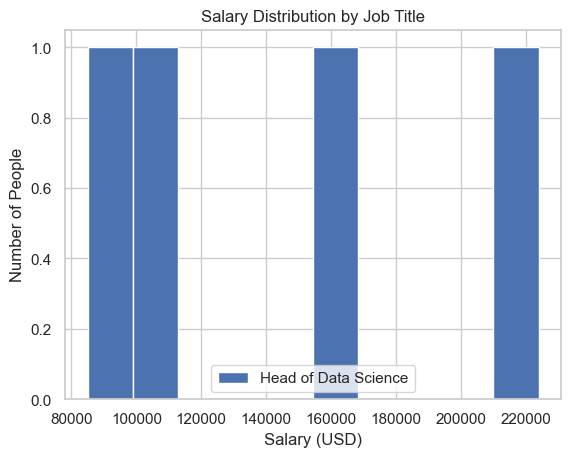

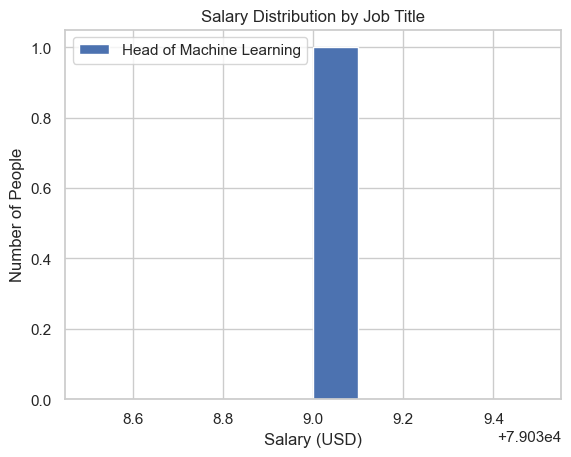

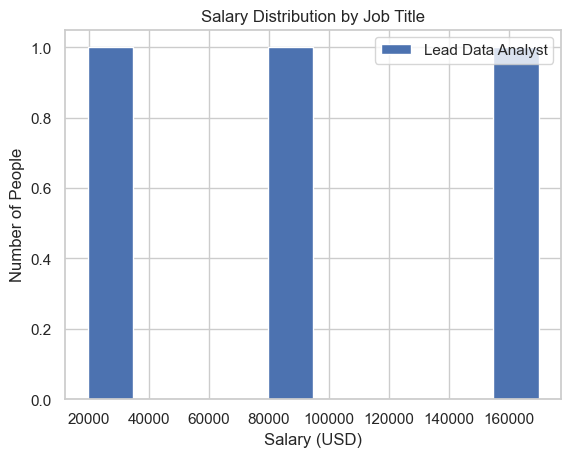

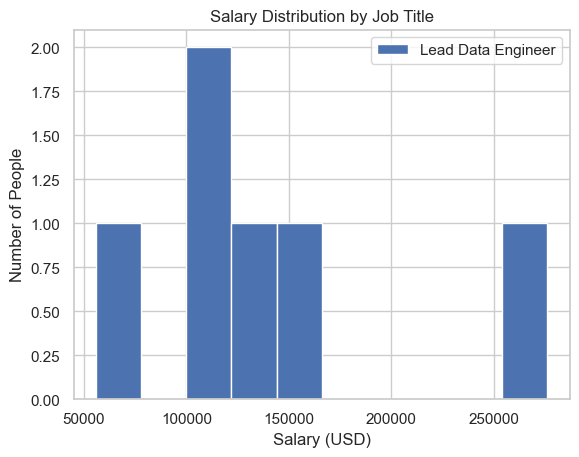

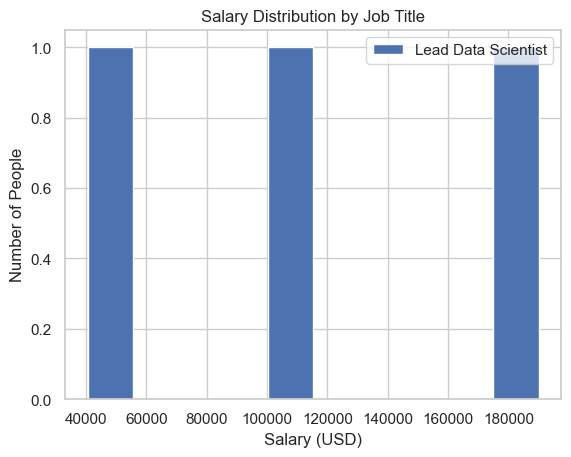

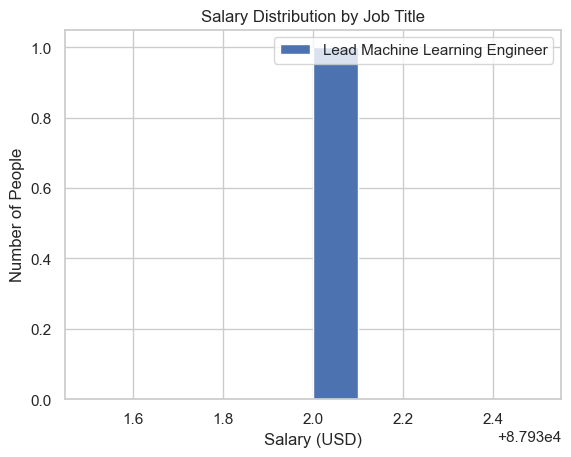

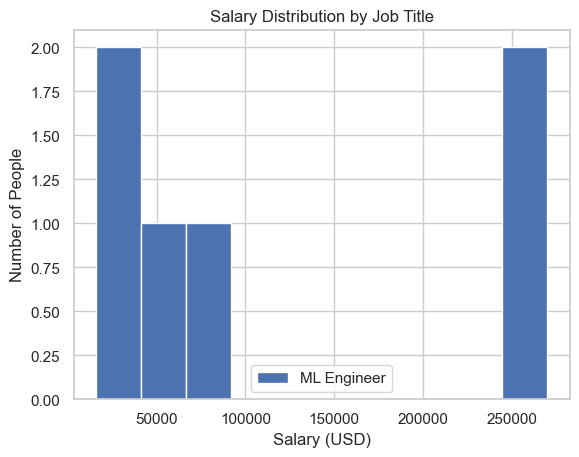

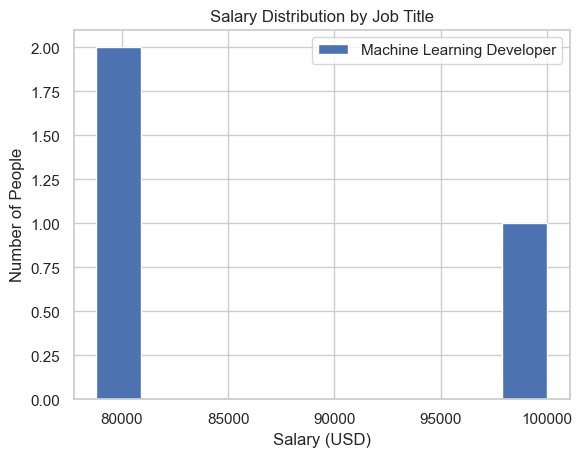

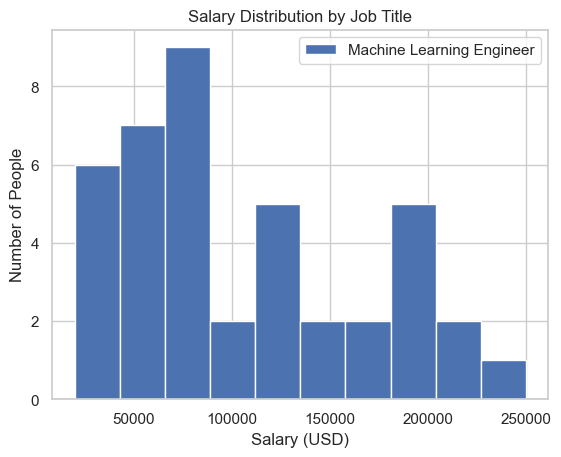

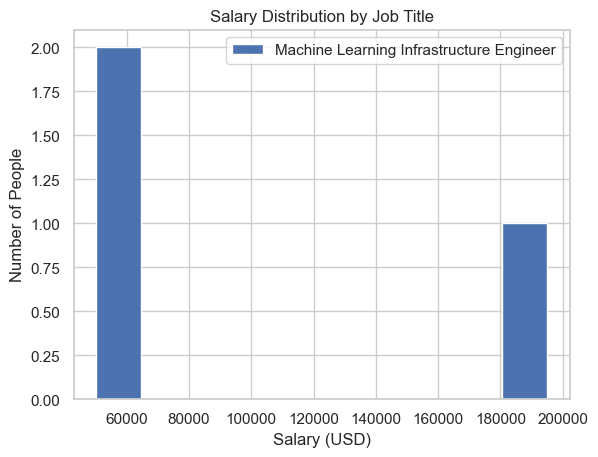

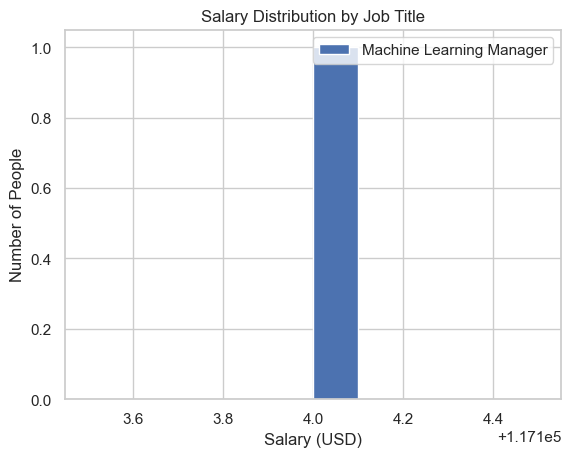

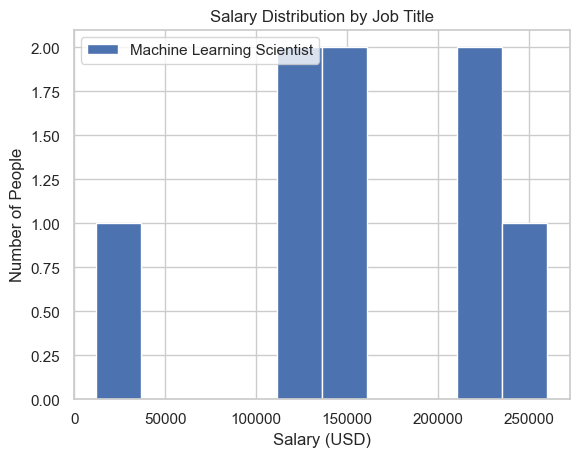

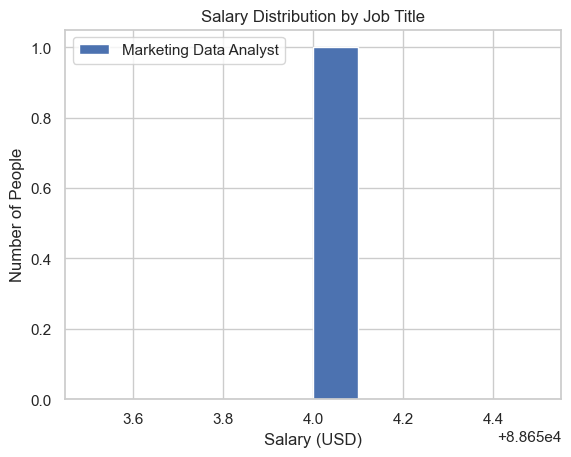

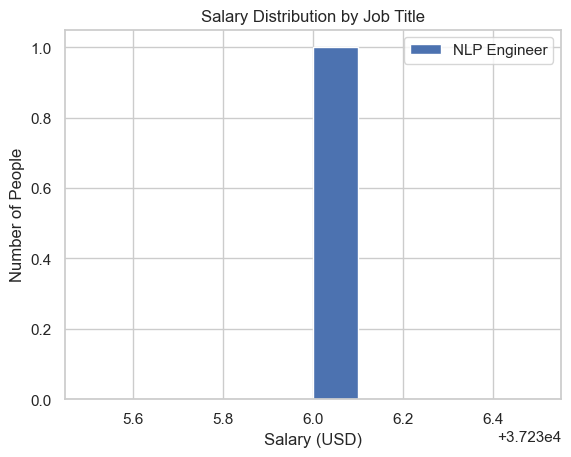

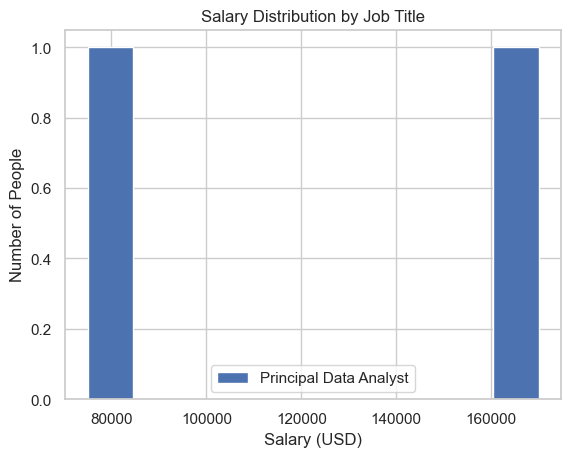

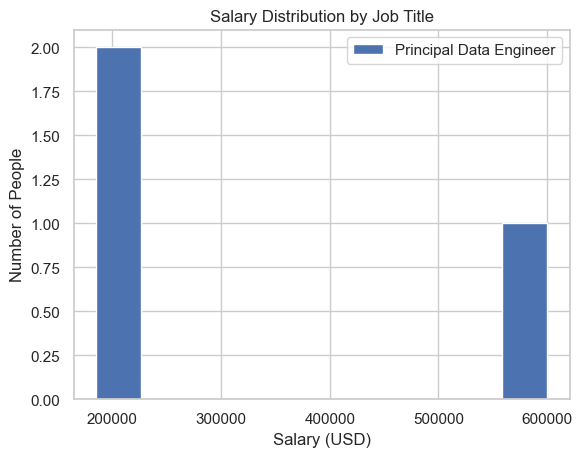

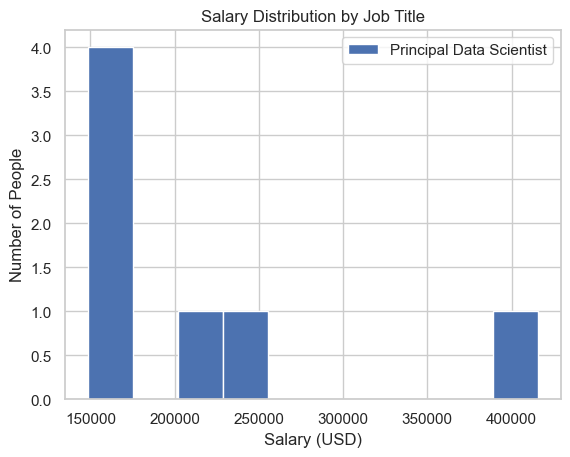

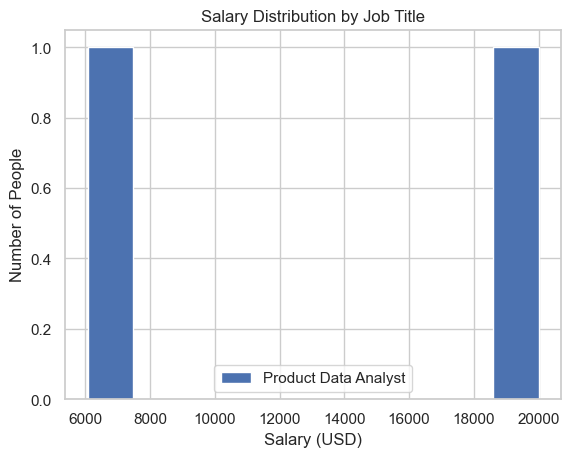

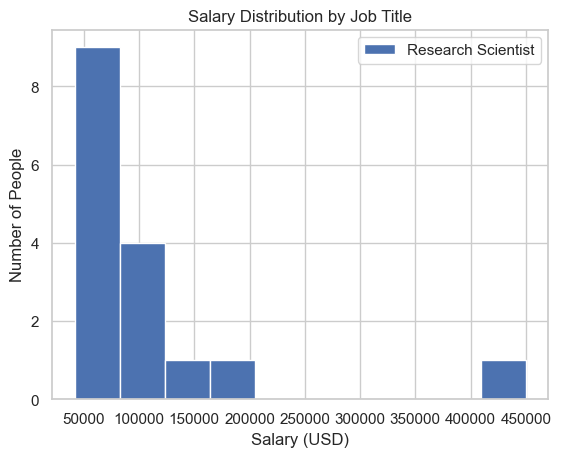

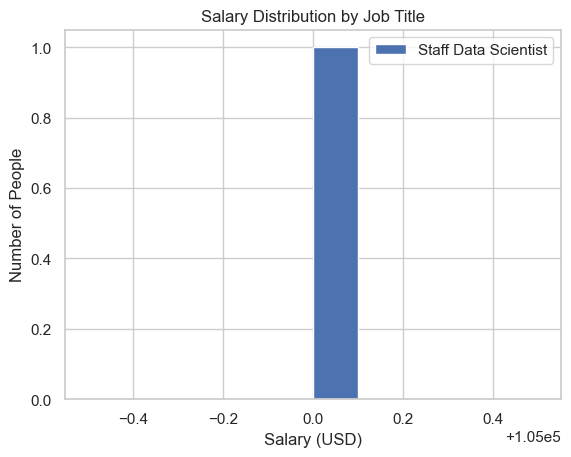

In [13]:
grouped_by_title = df.groupby('job_title')

# Analyze salary distribution for each job title (consider using boxplots or histograms)
for title, group_data in grouped_by_title:
    group_data['salary_in_usd'].plot.hist(label=title)
    plt.xlabel('Salary (USD)')
    plt.ylabel('Number of People')
    plt.title('Salary Distribution by Job Title')
    plt.legend()
    plt.show()

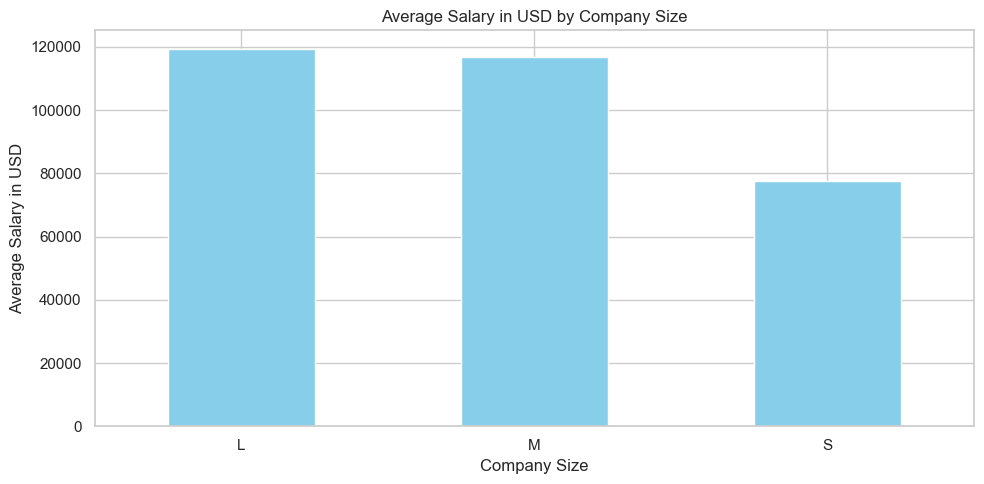

In [14]:
size_salary = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting the company size influence on salary
plt.figure(figsize=(10, 5))
size_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary in USD by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

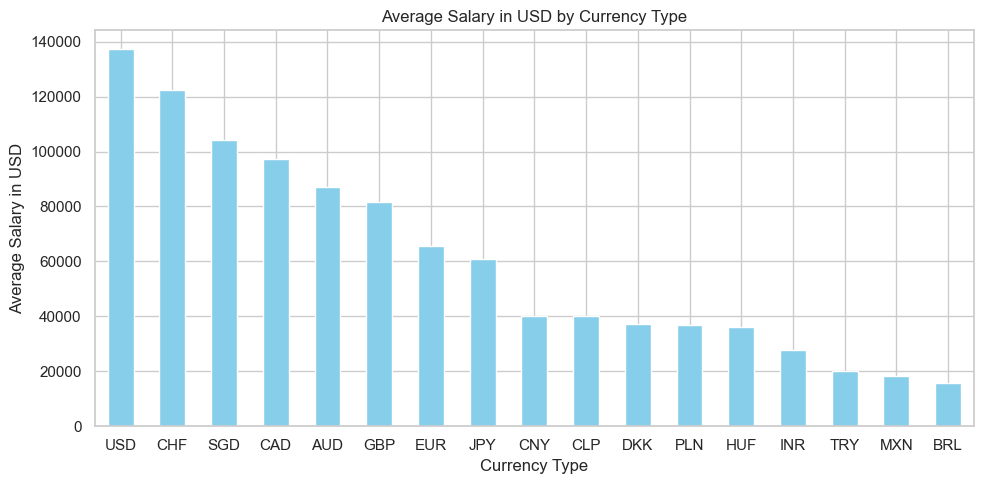

In [15]:
currency_salary = df.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting the impact of currency on salary
plt.figure(figsize=(10, 5))
currency_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary in USD by Currency Type')
plt.xlabel('Currency Type')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

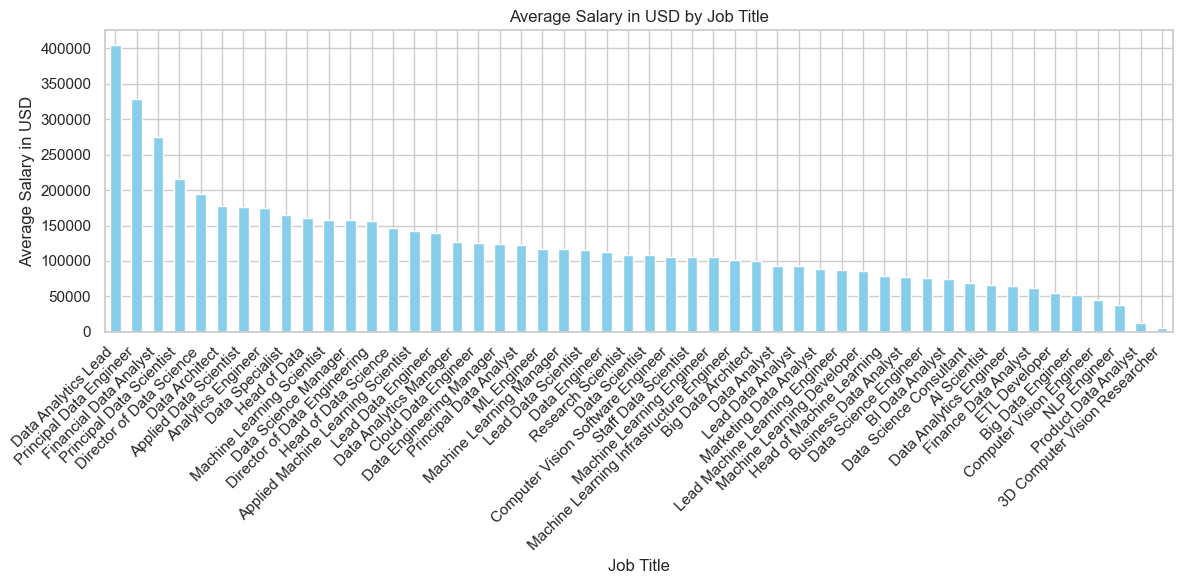

In [16]:
role_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting the average salary by job title
plt.figure(figsize=(12, 6))
role_salary.plot(kind='bar', color='skyblue')
plt.title('Average Salary in USD by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

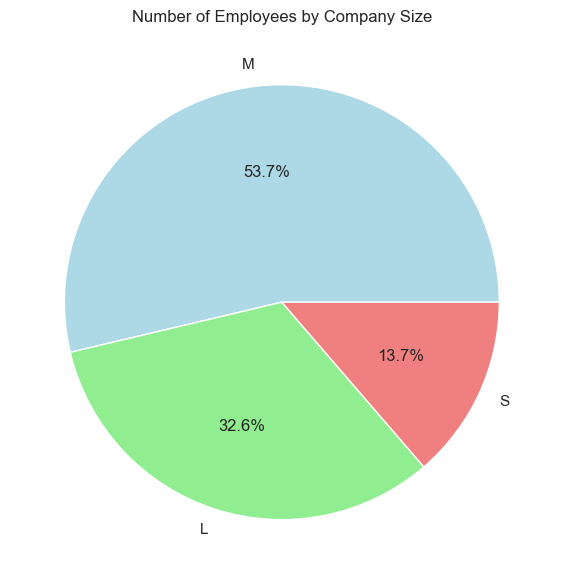

In [23]:
plt.figure(figsize=(6, 6))
df['company_size'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Number of Employees by Company Size')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8624\3765738105.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette="Set3")


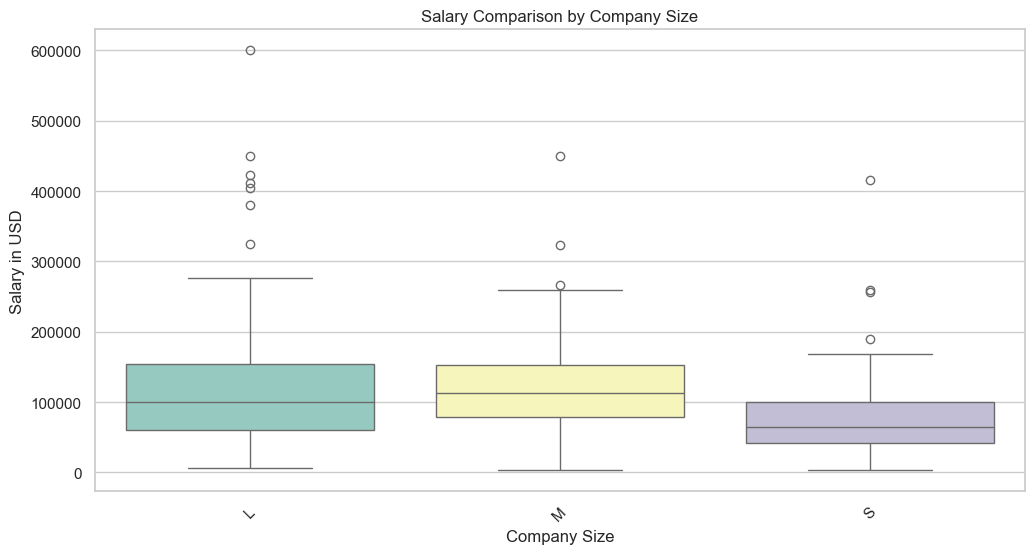

In [24]:
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df['company_size'] = df['company_size'].astype('category')

# Drop rows with missing salary_in_usd or company_size
df = df.dropna(subset=['salary_in_usd', 'company_size'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot to compare salaries by company size
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='company_size', y='salary_in_usd', data=df, palette="Set3")
ax.set_title('Salary Comparison by Company Size')
ax.set_xlabel('Company Size')
ax.set_ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


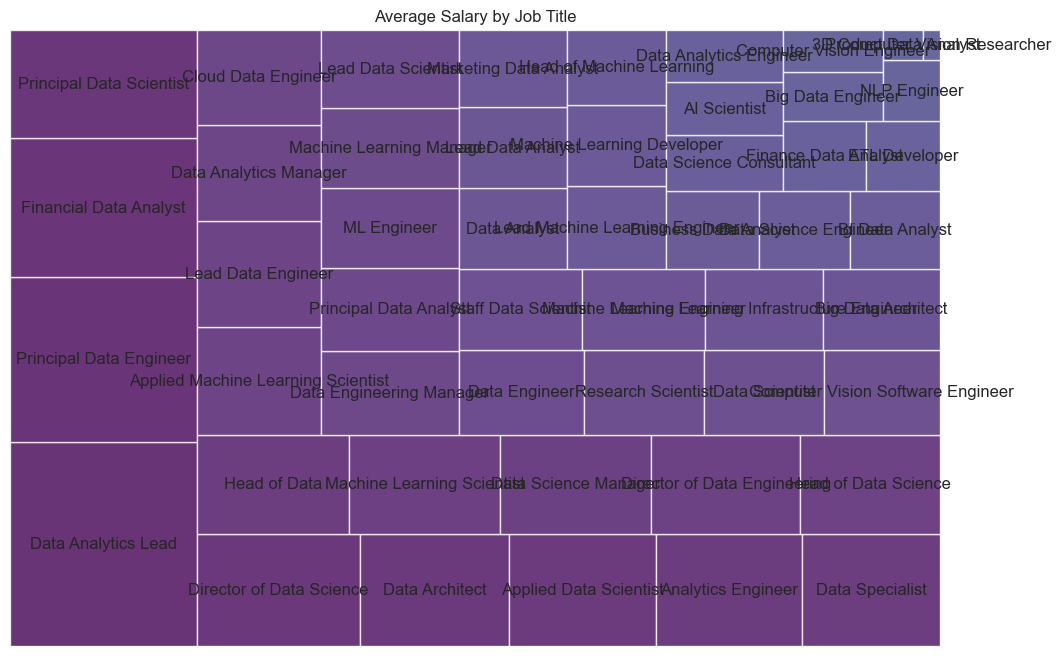

In [27]:
import squarify
average_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=average_salary_by_job.values, label=average_salary_by_job.index, alpha=.8, color=plt.cm.viridis(range(len(average_salary_by_job))))
plt.title('Average Salary by Job Title')
plt.axis('off')
plt.show()

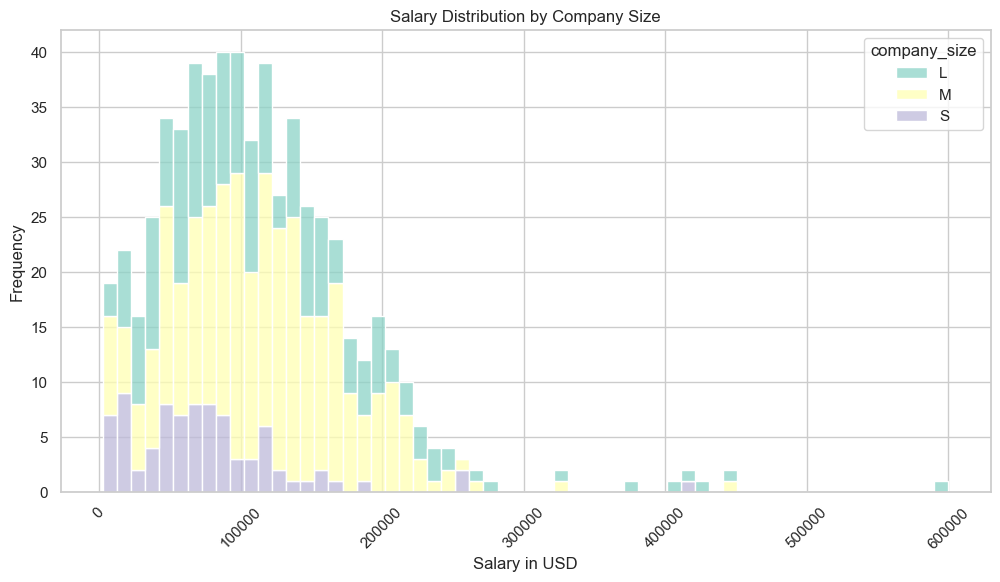

In [29]:
df = df.dropna(subset=['salary_in_usd', 'company_size'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a histogram to compare salaries by company size
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='salary_in_usd', hue='company_size', multiple='stack', palette="Set3", binwidth=10000)
ax.set_title('Salary Distribution by Company Size')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

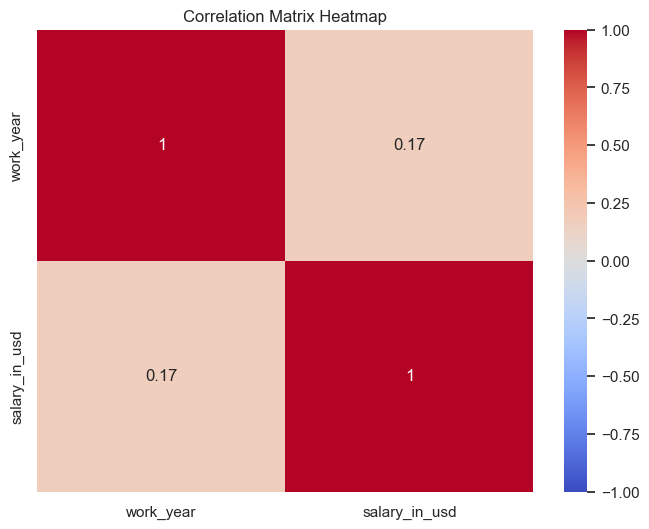

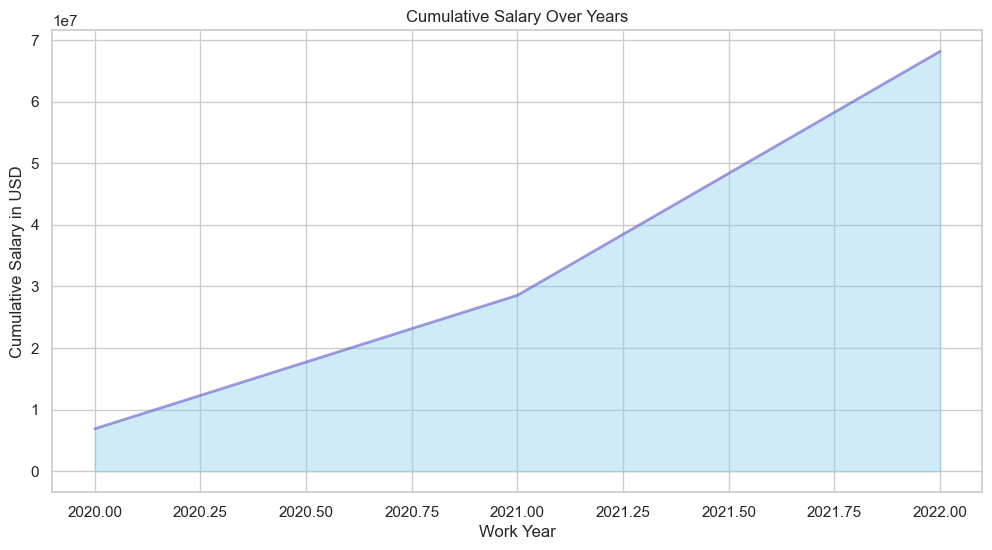

In [30]:
df['Salary in USD'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df['Work Year'] = pd.to_numeric(df['work_year'])

# Calculate correlation matrix
correlation_matrix = df[['work_year', 'salary_in_usd']].corr()

# Set the style of the visualization
sns.set(style="whitegrid")

# 1. Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Creating cumulative salary data
cumulative_salary = df.groupby('work_year')['salary_in_usd'].sum().cumsum()

# 2. Area Chart
plt.figure(figsize=(12, 6))
plt.fill_between(cumulative_salary.index, cumulative_salary.values, color="skyblue", alpha=0.4)
plt.plot(cumulative_salary.index, cumulative_salary.values, color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Cumulative Salary Over Years')
plt.xlabel('Work Year')
plt.ylabel('Cumulative Salary in USD')
plt.grid(True)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8624\416063701.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='company_size', y='salary_in_usd', data=df, palette="Set3")


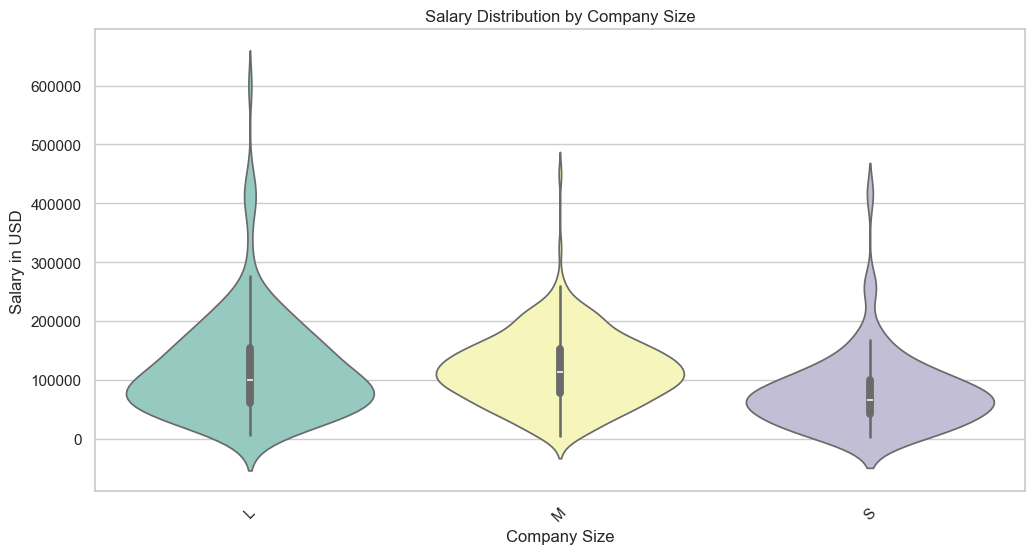

In [32]:
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

# Drop rows with missing salary_in_usd
df = df.dropna(subset=['salary_in_usd'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a violin plot to compare salaries by company size
plt.figure(figsize=(12, 6))
sns.violinplot(x='company_size', y='salary_in_usd', data=df, palette="Set3")
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()